# Netflix Content Analysis

## Objective
Analyze Netflix’s catalog to understand content distribution, trends over time,
and strategic insights related to content type, countries, and genres.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [37]:
# Load the dataset
df = pd.read_csv("data\netflix_titles.csv")
df.head()

OSError: [Errno 22] Invalid argument: 'data\netflix_titles.csv'

In [10]:
# Basic data exploration

df.info()
df.isnull().sum()
df.describe(include="all")
df.shape



<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      6173 non-null   str  
 4   cast          7982 non-null   str  
 5   country       7976 non-null   str  
 6   date_added    8797 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8803 non-null   str  
 9   duration      8804 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


(8807, 12)

In [11]:
# Data preprocessing

df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year


In [14]:
# Display the updated DataFrame to check the new data types

df[["date_added", "year_added"]].info()
df[["date_added", "year_added"]].head()



<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_added  8709 non-null   datetime64[us]
 1   year_added  8709 non-null   float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 137.7 KB


,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


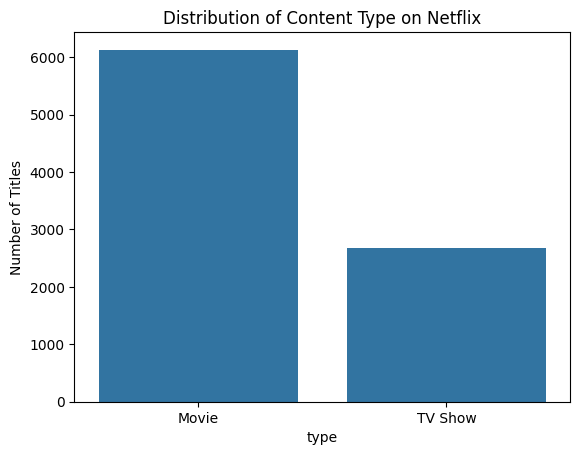

In [15]:
# Compter les types
type_counts = df["type"].value_counts()
print(type_counts)

# Visualisation
sns.countplot(data=df, x="type")
plt.title("Distribution of Content Type on Netflix")
plt.ylabel("Number of Titles")
plt.show()


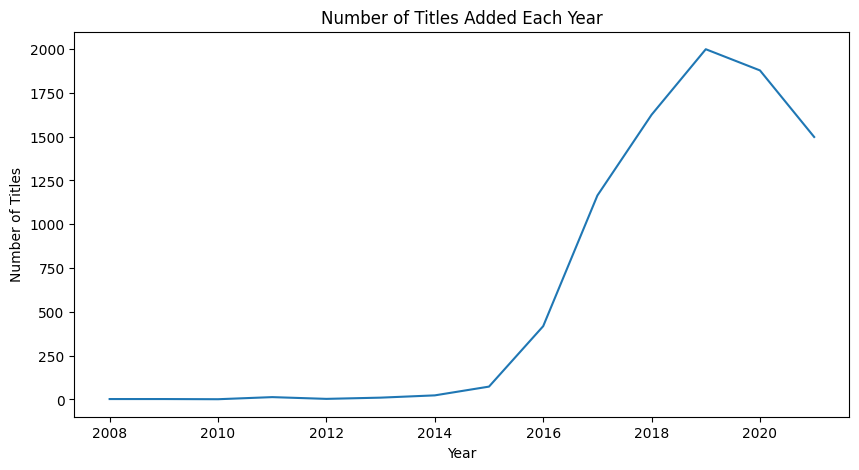

In [29]:
# Nombre de contenus ajoutés par année
df["year_added"].value_counts().sort_index().plot(kind="line", figsize=(10,5))
plt.title("Number of Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


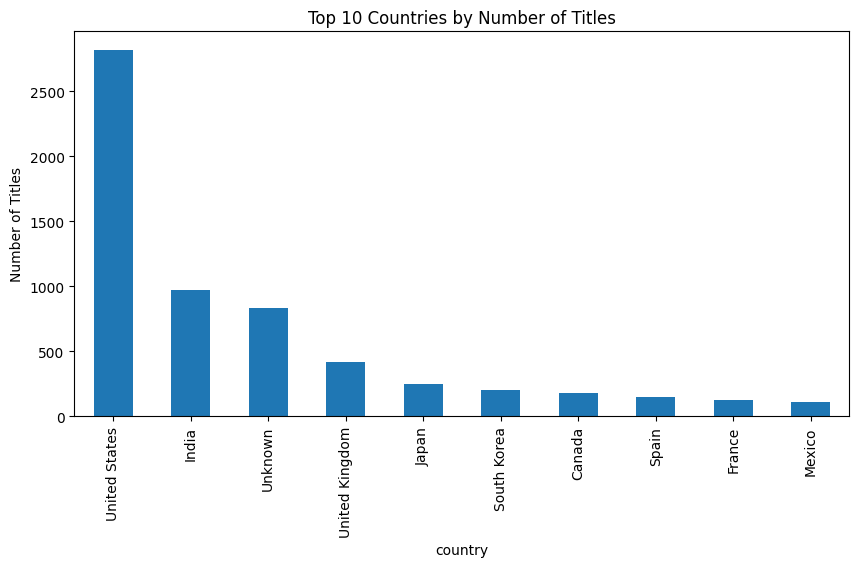

In [17]:
# Nettoyer les valeurs manquantes
df["country"] = df["country"].fillna("Unknown")

# Top 10 pays
top_countries = df["country"].value_counts().head(10)
print(top_countries)

# Visualisation
top_countries.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Countries by Number of Titles")
plt.ylabel("Number of Titles")
plt.show()


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


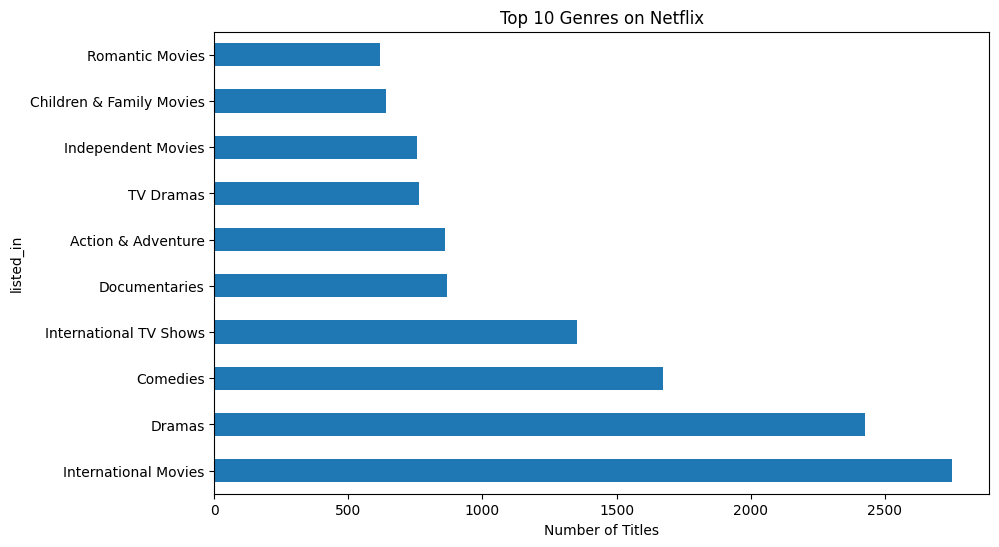

In [18]:
# Les genres sont séparés par des virgules → on explode
genres = df["listed_in"].str.split(", ").explode()
top_genres = genres.value_counts().head(10)
print(top_genres)

# Visualisation
top_genres.plot(kind="barh", figsize=(10,6))
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.show()


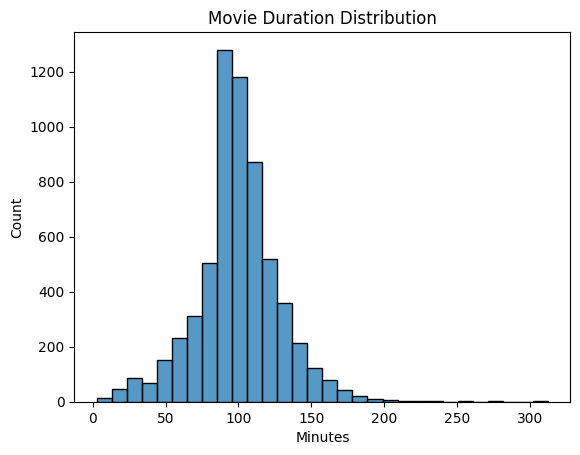

In [27]:
# Sélectionner films
movies = df[df["type"]=="Movie"].copy()

# Extraire la durée en minutes
movies["duration_min"] = movies["duration"].str.replace(" min","").astype(float)

# Visualisation
sns.histplot(movies["duration_min"], bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Minutes")
plt.show()


# Netflix Catalog Analysis

## Key Insights

### 1️⃣ Films vs TV Shows
- **Movies dominate** with 6131 titles, compared to 2676 TV Shows.
- Netflix seems to prioritize **films**, but TV Shows still represent a **significant fraction**, important for long-term retention.

### 2️⃣ Geographic Distribution
- United States dominates with 2818 titles.
- Significant contribution from **India (972)** and **United Kingdom (419)**.
- 831 titles have **unknown country**, likely due to missing metadata.
- Netflix shows a **clear trend towards international expansion**.

### 3️⃣ Genres / Categories
- Top genres:
  - International Movies: 2752
  - Dramas: 2427
  - Comedies: 1674
  - International TV Shows: 1351
  - Documentaries: 869
- Netflix invests heavily in **international content and dramas**, reflecting its global strategy and focus on diverse audiences.

### 4️⃣ Movie Durations
- Most movies range **~80 to 120 minutes**.
- Short movies (80–90 min) may target **quick viewing**, while longer movies (>100 min) cater to **binge/prime-time audience**.

### 5️⃣ Catalog Growth Over Time
- Very few titles before 2015; explosive growth **2016–2020**.
- Peak in 2019 (1999 titles added).
- Reflects **Netflix expansion and investment in content library** post-global launch.

## Business Implications
- Continued investment in **international content** is strategic.
- Focus on **dramas and comedies** aligns with wide audience appeal.
- Growth pattern suggests **opportunity to analyze regional trends further** (e.g., India, Korea).
- TV Shows, although fewer than movies, are likely key for **subscriber retention** and **long-term engagement**.
